In [1]:
#from functions_load import call_remote_file_ssh
from functions_analysis import loader, total, repeatedSynID_remover, persyn, fuse_clusters
import pandas as pd
from scipy.spatial.distance import pdist, squareform


In [2]:
csv_file_path = '/home/gerard/nextcloud/analysis/synaptic_computation/results/NOr_02.21.2020_Data1.csv'
evtype = 1 # synch evs
singleSynFlag = [0, 74982]
grapherFlag = True
clusteringFlag = True
clusteringAlgorithmFlag = 1
fuse_clusters_flag = False
plotFlag = True
fusedClustersFlag = fuse_clusters_flag



no repeated synIDs


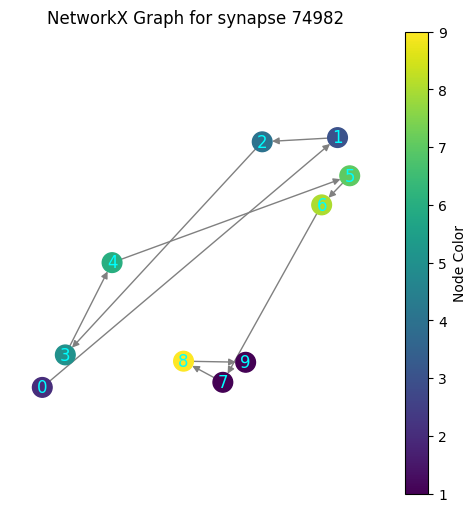

In [3]:
df = total(
        csv_file_path,
        evtype,
        singleSynFlag,
        clusteringFlag,
        fuse_clusters_flag,
        grapherFlag,            # print('here ', len(df_syn['cluster']), len(list(pos.keys())))

        fusedClustersFlag,
        clusteringAlgorithmFlag,
        plotFlag

          )


no repeated synIDs


/home/gerard/nextcloud/analysis/synaptic_computation/functions_scripts/functions_analysis.py:283: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 6))  # Adjust figure size (optional)


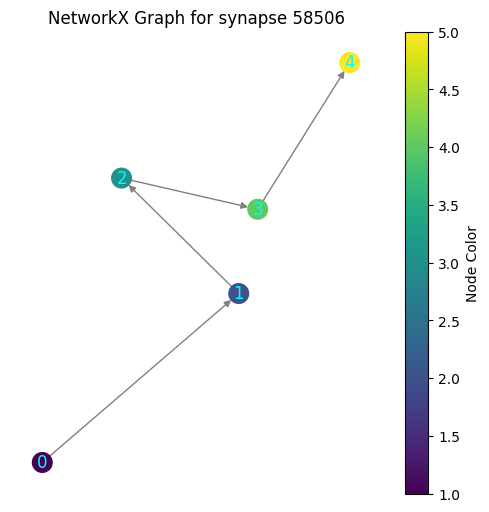

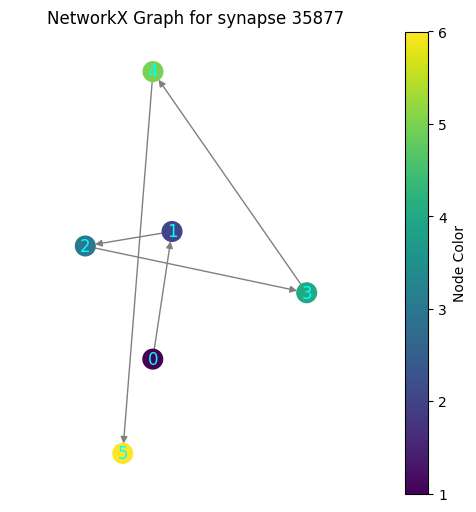

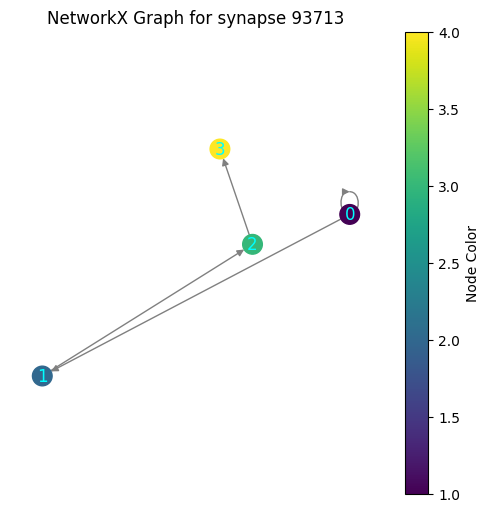

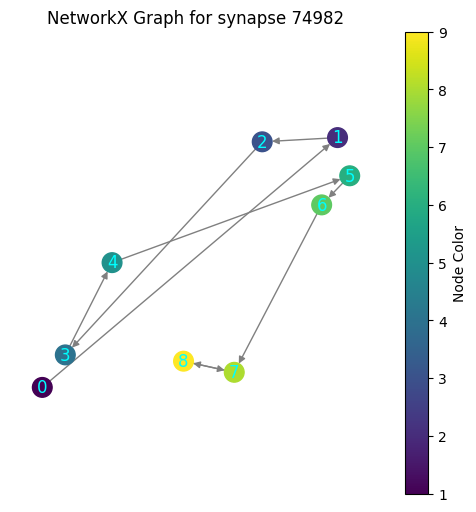

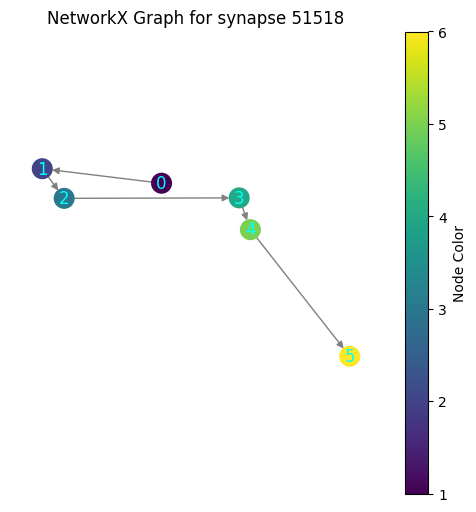

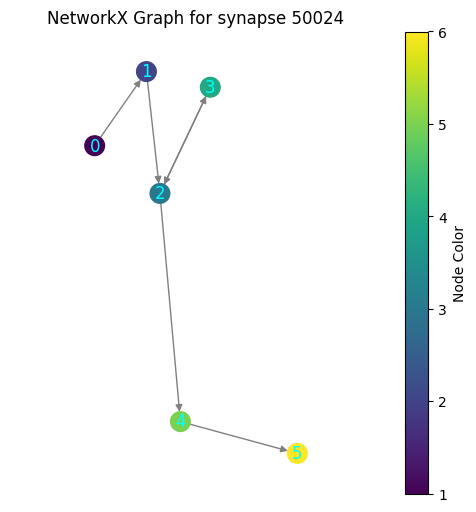

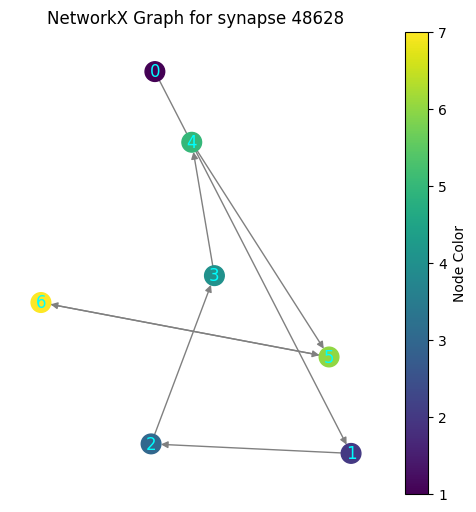

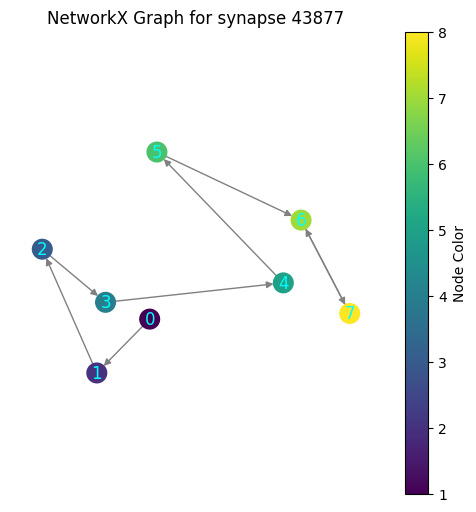

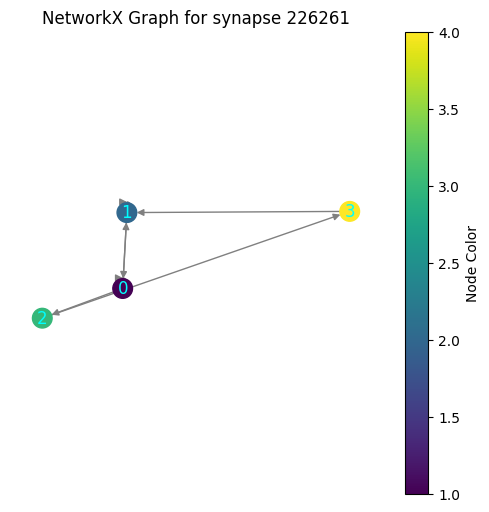

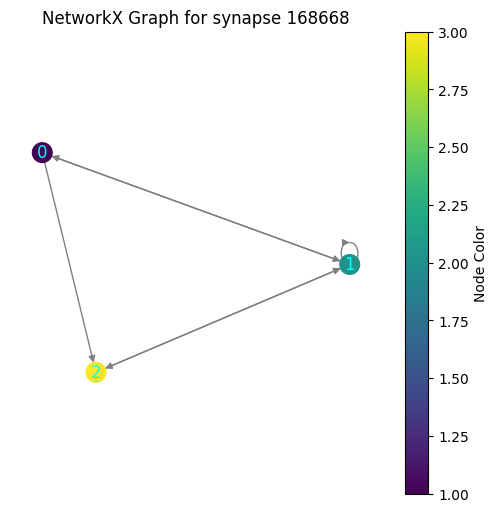

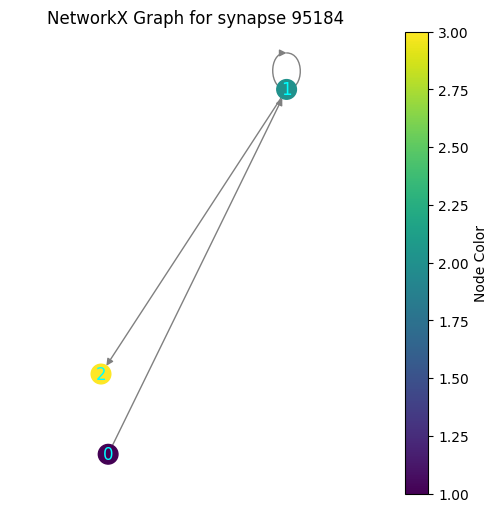

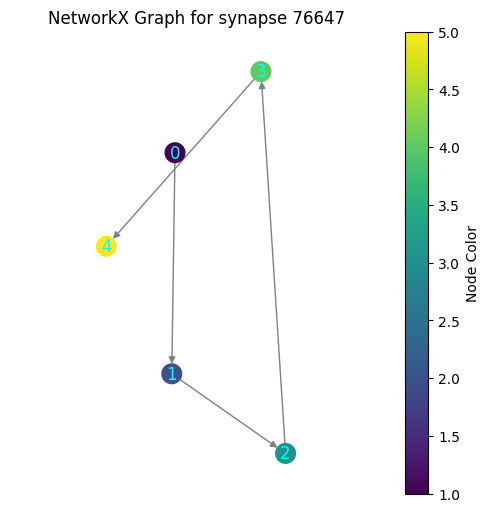

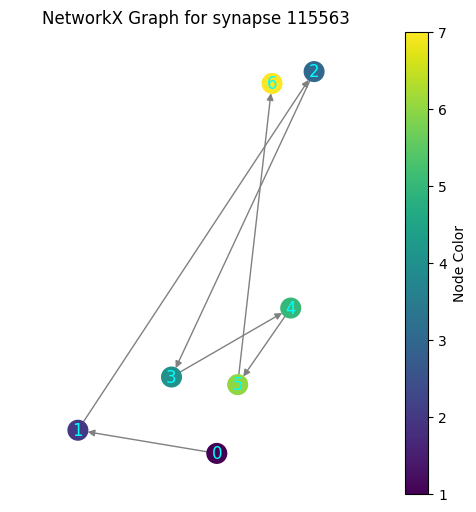

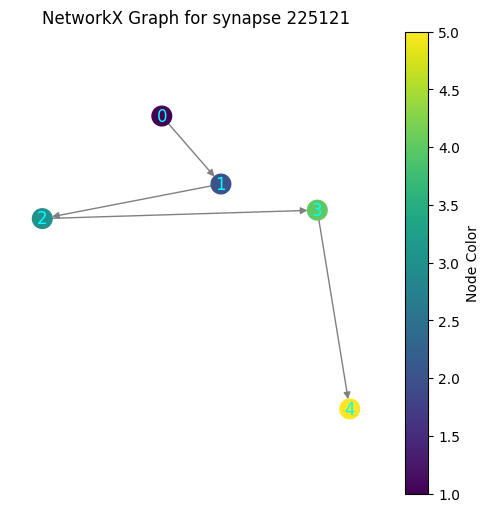

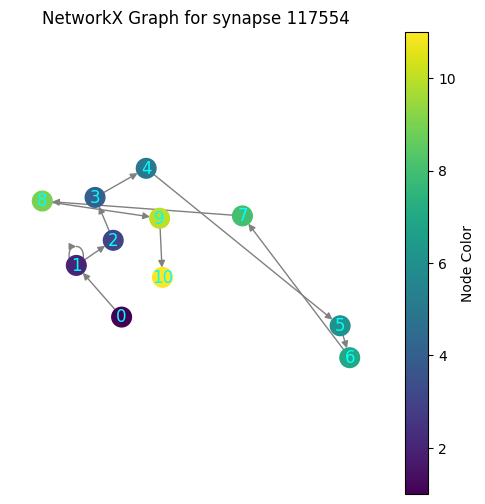

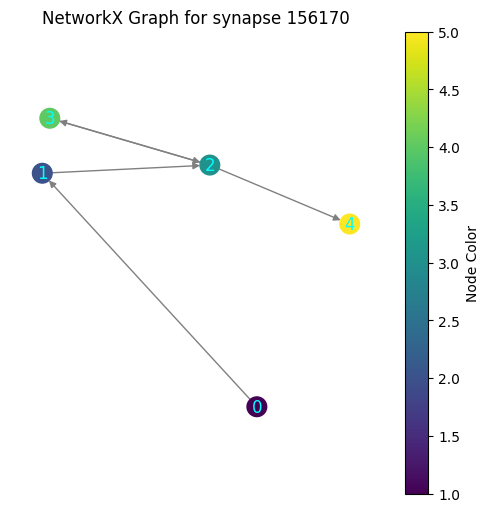

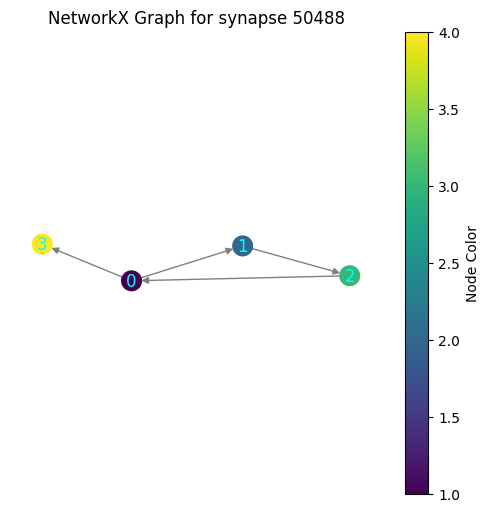

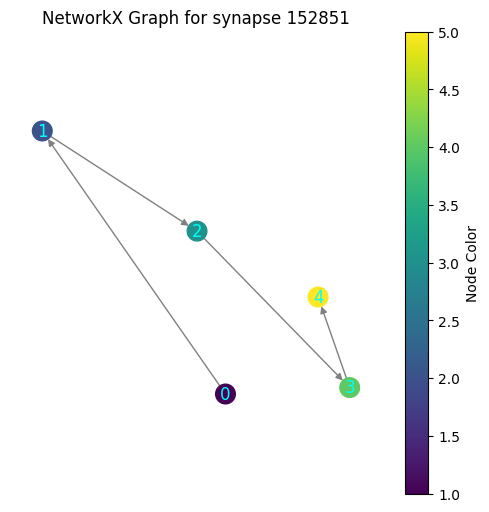

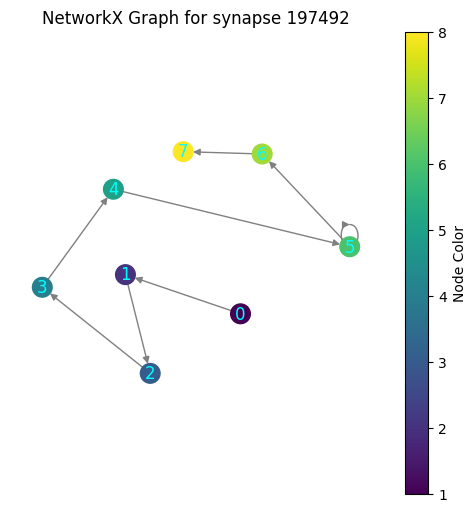

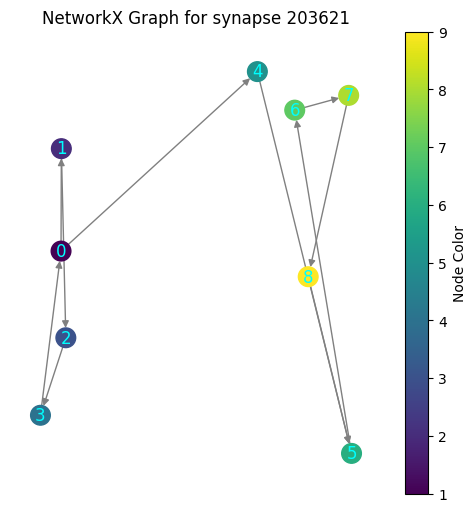

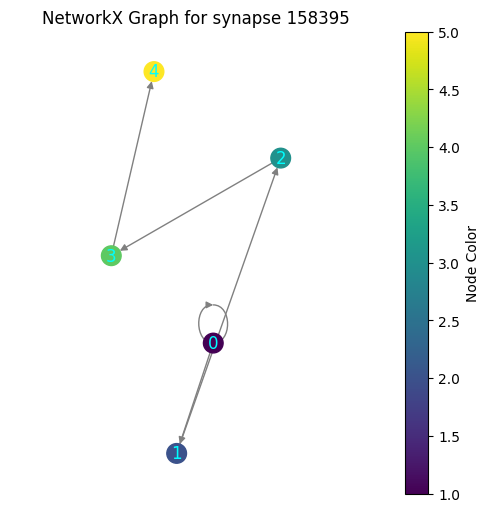

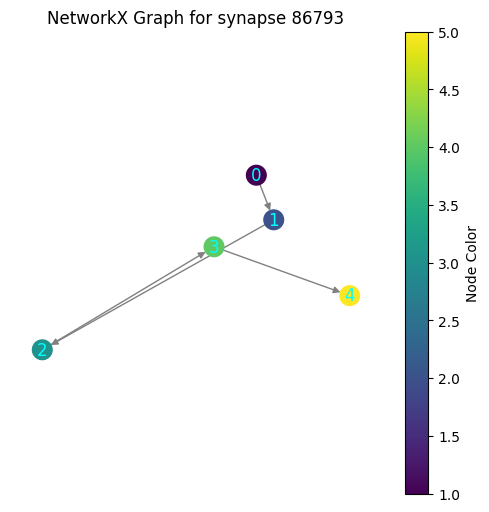

In [10]:
fuse_clusters_flag = True
fusedClustersFlag = fuse_clusters_flag
singleSynFlag = False#[0, 74982]

df = total(
        csv_file_path,
        evtype,
        singleSynFlag,
        clusteringFlag,
        fuse_clusters_flag,
        grapherFlag,
        fusedClustersFlag,
        clusteringAlgorithmFlag,
        plotFlag

          )


In [5]:
#fuse_clusters(df)

In [6]:
df.to_csv('/home/gerard/nextcloud/analysis/synaptic_computation/results/NOr_02.21.2020_Data1_3.csv', index=True)
# df4.to_csv('/home/gerard/nextcloud/analysis/synaptic_computation/results/df4.csv', index=True)

In [7]:
# print(df3)

In [8]:
pixel_size = 86.6667
eps_nm = 50
eps = eps_nm / pixel_size   # Maximum distance between samples to be considered part of the same cluster
print(eps, 'Maximum distance between samples to be considered part of the same cluster')

mask_ID = (df['synID'] == singleSynFlag[1])
df_syn = df.loc[mask_ID]

if df_syn.iloc[-1]['synID'] == df_syn.iloc[0]['synID']:
    points = df_syn[['x', 'y']]

    # Compute pairwise distances using Euclidean distance
    distances = pdist(points.values, metric='euclidean')

    # Convert to squareform to get the condensed distance matrix
    condensed_matrix = squareform(distances)
    print(condensed_matrix)
    print

0.5769228550296711 Maximum distance between samples to be considered part of the same cluster
[[0.         6.03739274 5.14630336 0.6218616  2.23177053 5.82614629
  5.20939881 3.00586038 2.24255978 3.00586038]
 [6.03739274 0.         1.17774151 5.43740616 4.0245684  0.62558053
  1.07916511 4.00284982 4.2380862  4.00284982]
 [5.14630336 1.17774151 0.         4.52901996 3.0083112  1.46518114
  1.3529177  3.62430268 3.63799429 3.62430268]
 [0.6218616  5.43740616 4.52901996 0.         1.61478483 5.24666716
  4.63650958 2.65100571 1.84794261 2.65100571]
 [2.23177053 4.0245684  3.0083112  1.61478483 0.         3.94956218
  3.39361539 2.5627995  1.90021873 2.5627995 ]
 [5.82614629 0.62558053 1.46518114 5.24666716 3.94956218 0.
  0.63095345 3.55799793 3.88659145 3.55799793]
 [5.20939881 1.07916511 1.3529177  4.63650958 3.39361539 0.63095345
  0.         2.94819796 3.2561331  2.94819796]
 [3.00586038 4.00284982 3.62430268 2.65100571 2.5627995  3.55799793
  2.94819796 0.         0.81051724 0.    

In [9]:
from scipy.spatial.distance import squareform
import numpy as np



# Iterate through the elements of the square distance matrix
for i in range(condensed_matrix.shape[0]):
    for j in range(i + 1, condensed_matrix.shape[1]):  # Only consider upper triangle
        if condensed_matrix[i, j] < eps:
            print(f"Value {condensed_matrix[i, j]} is smaller than {eps}")
            print(f"Row index: {i}, Column index: {j}")


Value 0.0 is smaller than 0.5769228550296711
Row index: 7, Column index: 9
